In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# load dataset

In [56]:
iris=datasets.load_iris()
print(type(iris))
print(list(iris.keys()))
print(iris['feature_names'])
print(iris['target'])
print(iris['DESCR'])

<class 'sklearn.utils._bunch.Bunch'>
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virg

In [10]:
X=iris['data'][:,3:] #基于花瓣宽度
y=(iris['target']==2).astype(int) # (iris['target'] == 2)：这是一个布尔条件，它将目标变量中的每个元素与2进行比较，如果目标值等于2，条件为True；否则，条件为False。 布尔类型的Series转换为整数类型
print(type(X),type(y))
print(X)
print(y)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]


In [11]:
print(X[y==1])
print(y[y==1])

[[2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]
 [2.3]
 [2.5]
 [2.3]
 [1.9]
 [2. ]
 [2.3]
 [1.8]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [4]:
log_reg=LogisticRegression()
log_reg.fit(X,y)
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
y_log_proba=log_reg.predict_log_proba(X_new)
print(y_proba)
print(y_log_proba)

[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]
[[-7.50265467e-04 -7.19545857e+00]
 [-7.60088181e-04 -7.18245612e+00]
 [-7.70039448e-04 -7.16945381e+00]
 ...
 [-5.78160947e+00 -3.08851276e-03]
 [-5.79458187e+00 -3.04864536e-03]
 [-5.80755478e+00 -3.00929180e-03]]


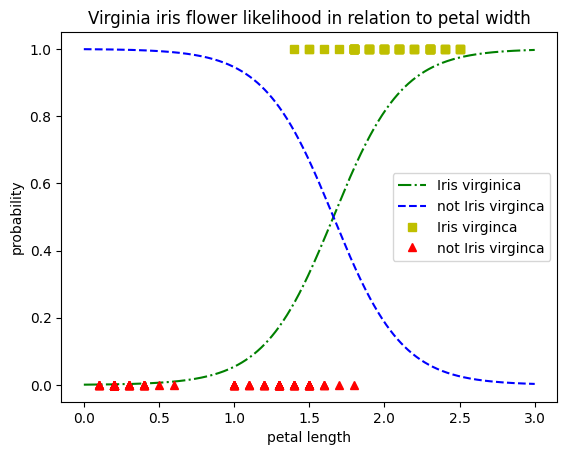

In [12]:
plt.plot(X_new,y_proba[:,1],'g-.',label='Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='not Iris virginca')
plt.plot(X[y==1],y[y==1],'ys',label='Iris virginca')
plt.plot(X[y==0],y[y==0],'r^',label='not Iris virginca')
plt.title('Virginia iris flower likelihood in relation to petal width')
plt.xlabel('petal length')
plt.ylabel('probability')
plt.legend()
plt.show()

In [38]:
X_=iris['data'][:,2:]
y_=(iris['target']==2).astype(int)

In [39]:
log_reg_=LogisticRegression()
log_reg_.fit(X_,y_)
petal_length=np.linspace(1,7,1000)
print(log_reg_.coef_,log_reg_.intercept_)

[[2.77762524 2.38552012]] [-17.5481106]


In [40]:
petal_width=(-petal_length*log_reg_.coef_[0,0]-log_reg_.intercept_)/log_reg_.coef_[0,1]
print(petal_width)

[ 6.19172533e+00  6.18473213e+00  6.17773892e+00  6.17074572e+00
  6.16375251e+00  6.15675930e+00  6.14976610e+00  6.14277289e+00
  6.13577968e+00  6.12878648e+00  6.12179327e+00  6.11480007e+00
  6.10780686e+00  6.10081365e+00  6.09382045e+00  6.08682724e+00
  6.07983404e+00  6.07284083e+00  6.06584762e+00  6.05885442e+00
  6.05186121e+00  6.04486801e+00  6.03787480e+00  6.03088159e+00
  6.02388839e+00  6.01689518e+00  6.00990197e+00  6.00290877e+00
  5.99591556e+00  5.98892236e+00  5.98192915e+00  5.97493594e+00
  5.96794274e+00  5.96094953e+00  5.95395633e+00  5.94696312e+00
  5.93996991e+00  5.93297671e+00  5.92598350e+00  5.91899030e+00
  5.91199709e+00  5.90500388e+00  5.89801068e+00  5.89101747e+00
  5.88402427e+00  5.87703106e+00  5.87003785e+00  5.86304465e+00
  5.85605144e+00  5.84905823e+00  5.84206503e+00  5.83507182e+00
  5.82807862e+00  5.82108541e+00  5.81409220e+00  5.80709900e+00
  5.80010579e+00  5.79311259e+00  5.78611938e+00  5.77912617e+00
  5.77213297e+00  5.76513

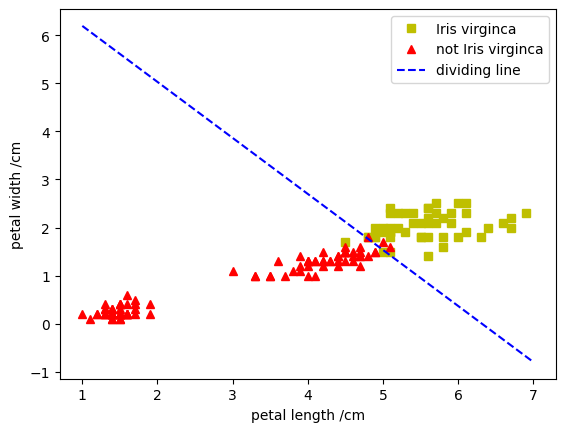

In [42]:
X_class0=X_[y_==0]
X_class1=X_[y_==1]
plt.plot(X_class1[:,0],X_class1[:,1],'ys',label='Iris virginca') # 画出维吉尼亚鸢尾花的散点图
plt.plot(X_class0[:,0],X_class0[:,1],'r^',label='not Iris virginca') # 画出非维吉尼亚鸢尾花的散点图
plt.plot(petal_length,petal_width,'b--',label='dividing line') # 画出类别分割线
plt.xlabel('petal length /cm')
plt.ylabel('petal width /cm')
plt.legend()
plt.show()

In [66]:
X=iris['data'][:,(2,3)]
y=iris['target']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [71]:
softmax_reg=LogisticRegression(multi_class='multinomial',C=10)
softmax_reg.fit(X,y)
print(softmax_reg.coef_,softmax_reg.intercept_)
input_data=np.array([[5,2]])
print(softmax_reg.predict_proba(input_data))
linear_combination=input_data.dot(softmax_reg.coef_.T)+softmax_reg.intercept_
probabilities=np.exp(linear_combination)/np.sum(np.exp(linear_combination),axis=1,keepdims=True)
print(probabilities)

[[-4.58614563 -2.24129385]
 [ 0.16068263 -2.15860167]
 [ 4.425463    4.39989552]] [ 18.87514796   6.3844344  -25.25958236]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


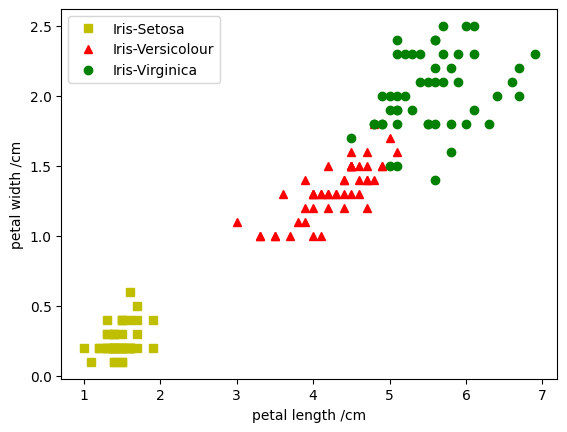

In [68]:
X_class0=X[y==0]
X_class1=X[y==1]
X_class2=X[y==2]
plt.plot(X_class0[:,0],X_class0[:,1],'ys',label='Iris-Setosa') # 画出鸢尾花的散点图
plt.plot(X_class1[:,0],X_class1[:,1],'r^',label='Iris-Versicolour') # 画出变色鸢尾花的散点图
plt.plot(X_class2[:,0],X_class2[:,1],'go',label='Iris-Virginica') # 画出维吉尼亚鸢尾花的散点图
# plt.plot(petal_length,petal_width,'b--',label='dividing line') # 画出类别分割线
plt.xlabel('petal length /cm')
plt.ylabel('petal width /cm')
plt.legend()
plt.show()